# Overview
Here the types of ML will be introduced here whithout any theory.

###  

###  

###  1. Supervised : Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

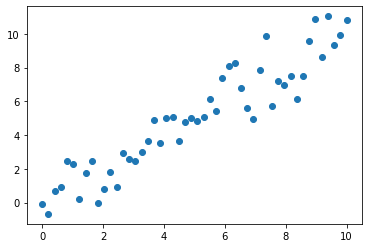

In [30]:
spacex = np.linspace(0, 10, 50)          # Data   - Independent
spacey = spacex - np.random.randn(50)    # Answer - Dependent

plt.scatter(spacex, spacey)

In [31]:
# 1. Choose the Class model
from sklearn.linear_model import LinearRegression

In [32]:
# 2. Choose the hyperparameters
model = LinearRegression(fit_intercept= True)

In [35]:
# 3. Massage the data / Arrange the data to fit
spacex.shape, spacey.shape

((50,), (50,))

In [37]:
spacex[:, np.newaxis].shape

(50, 1)

In [38]:
spaceX = spacex[:, np.newaxis]

In [39]:
#4. Fit the data to the model
model.fit(spaceX, spacey)

LinearRegression()

##### That's it for now, the model has been trained to its best and let's check the `Intercept` and `Slope`

In [40]:
model.intercept_

-0.06858557353160055

In [41]:
model.coef_

array([1.01910208])

##### Now, let's plot it.
    Remember, the plotting is not convineant in the Matplotlib as we have to do some stuff mannually.
    
    Theory in plotting:
    
    >    You see there is a line going from the data called Best Fit line and it is actully there.
         Now, we need the intercept and the coef to plot the line in the plot. But ... let's just
         look at the code.
         
```python
plt.plot(spacex, model.predict(spaceX), linewidth= 2, color= 'red')
```
will plot the line prefectly matched with the intercept and the slope. And with printing them with `plt.scatter` will give the results as shown below

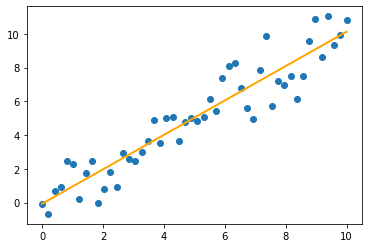

In [55]:
plt.scatter(spacex, spacey)
plt.plot(spacex, model.predict(spaceX), linewidth= 2, color= 'orange')

###  

###  

###  2. Supervised : Classification

    The example before was of the Regression as we needed to predict a perticulart value, but now 
    the problem is to classify things, so the Linear Regression will not help. So we will use 
    
    Naive Bayes classifier.
    
Again, there is not theory included in this notebook so don't expect to describe the theory now. The theory will be covered in the upcoming books.

In [4]:
import pandas as pd   # To tweak dataset
import seaborn as sns # To load dataset

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

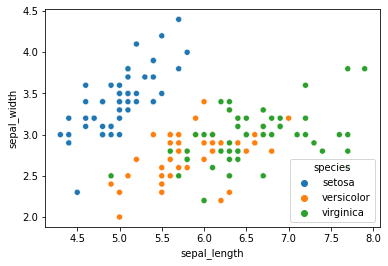

In [9]:
sns.scatterplot(x= 'sepal_length', y= 'sepal_width', data= iris, hue= 'species' )  # to visualize the distribution

##### Now, I want to train the model to distinguish between three of them. 

In [2]:
# 0. Prepare the data
from sklearn.model_selection import train_test_split

In [12]:
X = iris.drop(['species'], axis= 1)
Y = iris.species

In [22]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

###  

In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state= 1)

In [26]:
Xtrain.shape

(112, 4)

In [28]:
Xtest.shape

(38, 4)

In [29]:
# 1. Choose the model
from sklearn.naive_bayes import GaussianNB

In [30]:
# 2. Choose the hyperparameters
model = GaussianNB()

In [31]:
# 3. Massage Data
''' Done that already '''

' Done that already '

In [32]:
# 4. Fit in the model
model.fit(Xtrain, Ytrain)

GaussianNB()

In [39]:
# 5. Predict the new data
model.predict(Xtest)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

    If you try to see the model.<TAB> there will be nothing like 'accuracy'.
    So, to get the accuracy score...
```python
from sklearn.metrics import accuracy_score
```

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score( Ytest, model.predict(Xtest) )

0.9736842105263158

#### Woh!  

###  

###  

###  3. Unsupervised : Dimentionality reduction

In [42]:
# 1. Select the right model
from sklearn.decomposition import PCA

In [87]:
# 2. Choosing hyperparameters
model = PCA(n_components= 2)

In [88]:
# 3. Massage the data
''' Data is ready '''

' Data is ready '

In [89]:
# 4. Fit the data into model
model.fit(X)

PCA(n_components=2)

In [90]:
# ?. Transform the data
reduced_X = model.transform(X)

In [91]:
reduced_X.shape

(150, 2)

#### Notice:
    Before reducing the X its shape was...
```python
    X.shape --> 150,4
```
after
```python
    model.fit(X)   # This step ( fitting ) is required
    model.transform(X) --> 150, 2
```

## Also notice...
There is soomething called `n_components` is the number for **new dimention**.  
Means, giving `1 -> 1D, 2 -> 2D, 3 -> 3D, 4 -> 4D`

But giving more will give the error... means the original data has 4 dimentions and in the new data you are giving the 5, then it will throw an error

In [98]:
iris['X'] = reduced_X[:, 0]
iris['Y'] = reduced_X[:, 1]

<AxesSubplot:xlabel='X', ylabel='Y'>

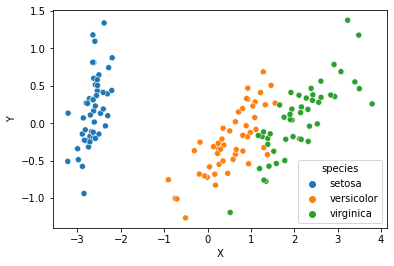

In [100]:
sns.scatterplot(x= 'X', y= 'Y', data= iris, hue= 'species')

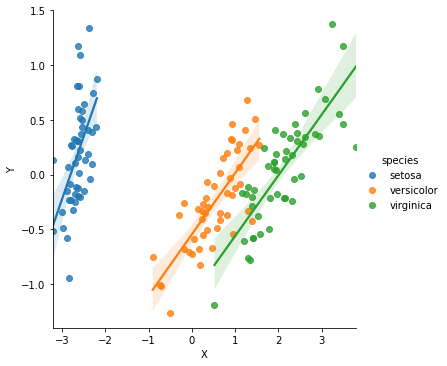

In [103]:
sns.lmplot(x= 'X', y= 'Y', data= iris, hue= 'species')

#### Also trid with the 3D projetion... and found new thing to map the colors with the classes

```python
col= iris.species.map({'setosa': 1,'versicolor': 2,'virginica': 3})
```

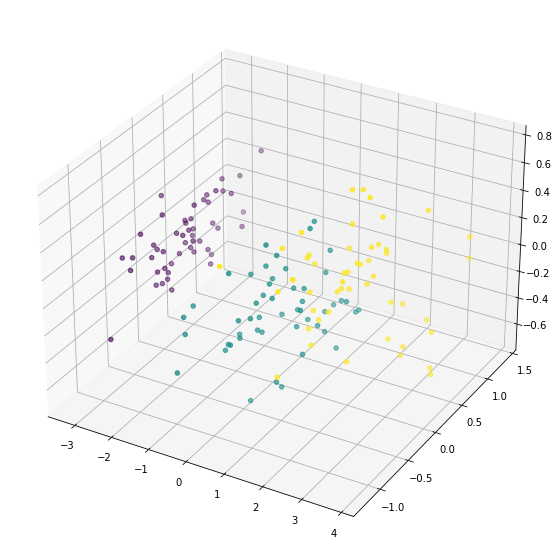

In [157]:
plt.figure(figsize= (10,10))
ax = plt.axes(projection= '3d')
ax.scatter(iris.X, iris.Y, iris.Z, c= col)

###  

###  

###  4. Unsupervised : Clustering

In [104]:
# 1. Model Selection
from sklearn.mixture import GaussianMixture

In [158]:
# 2. Choose hyperparameters
model = GaussianMixture(n_components= 3, covariance_type= 'full')

In [159]:
model.fit(X)

GaussianMixture(n_components=3)

In [160]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [161]:
iris['cluster'] = model.predict(X)

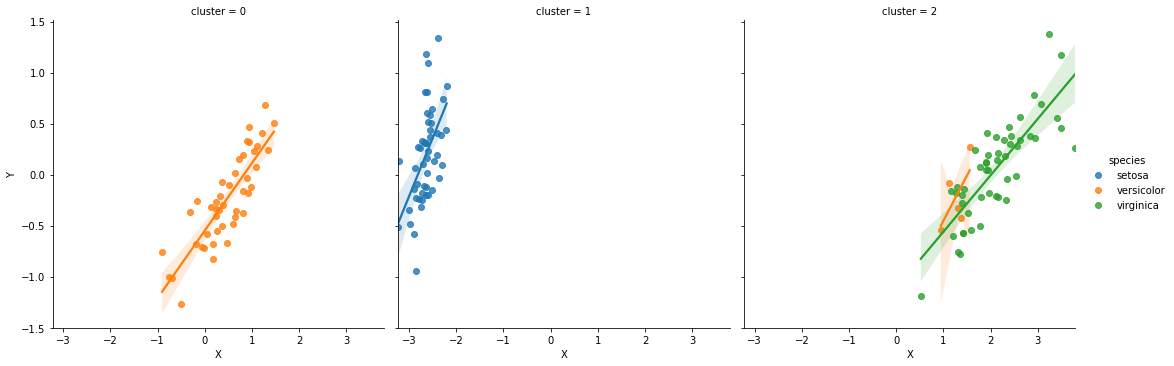

In [162]:
sns.lmplot(x= 'X', y= 'Y', hue='species', data= iris, col= 'cluster')

### Application for Handwritten Digits

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

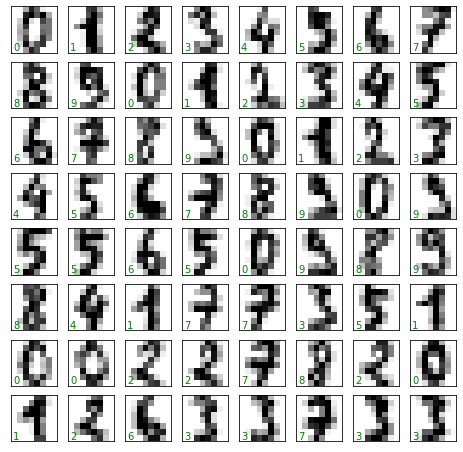

In [13]:
fig, axes = plt.subplots(8, 8, figsize= (8,8), subplot_kw= {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap= 'binary', interpolation= 'nearest')
    ax.text(.05, .05, digits.target[i], transform= ax.transAxes, color= 'green')

#### Enough, let's do the Dimentionality reduction...

In [14]:
# 1. Choose the model
from sklearn.manifold import Isomap

In [15]:
# 2. Choose hyperparameters
iso = Isomap(n_components= 2)

In [16]:
# 3. Prepare / Massage the data
X = digits.data
Y = digits.target

In [17]:
X.shape

(1797, 64)

In [18]:
Y.shape

(1797,)

In [19]:
# 4. Fit the data
iso.fit(X)

Isomap()

In [21]:
data_in_2D = iso.transform(X)

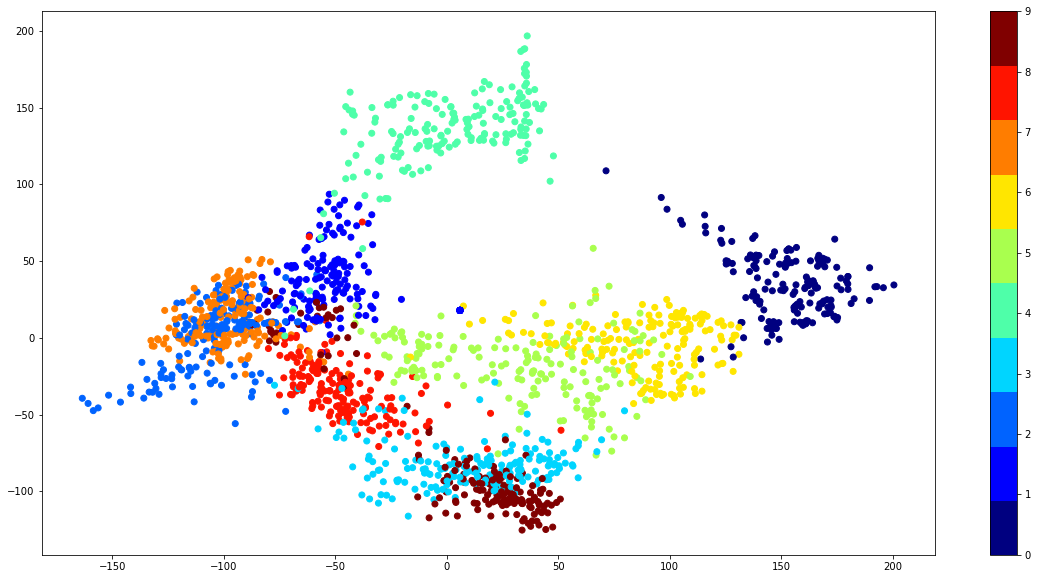

In [36]:
fig = plt.figure(figsize= (20,10))
plt.scatter(data_in_2D[:, 0], data_in_2D[:, 1], c=Y, cmap= plt.get_cmap('jet', 10))
plt.colorbar()

    Unsupervised seems to be working pretty fine here... let's try the supervised now.

### Supervised on handwritten digits

In [37]:
# 1. Choose the model 
''' As it is the classification problem, we will use the Naive Bays Classifier '''
from sklearn.naive_bayes import GaussianNB

In [39]:
# 2. Choose the hyperparameters
model = GaussianNB()

In [40]:
# 3. Massage the data
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state= 0)

In [41]:
Xtrain.shape

(1347, 64)

In [42]:
Ytrain.shape

(1347,)

In [43]:
Xtest.shape

(450, 64)

In [44]:
Ytest.shape

(450,)

In [49]:
# 4. Fit the data in model
model.fit(Xtrain, Ytrain)

GaussianNB()

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(Ytest, model.predict(Xtest))

0.8333333333333334

##### As from the book, this number of ~ 83% doesn't tell us something where we went wrong. So, we will take another approach

In [54]:
import seaborn as sns

## Introducing new thing: `Confusion Matrix`
```python
from sklearn.metrics import confusion_matrix
```

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
matrix = confusion_matrix(Ytest, model.predict(Xtest))

In [57]:
matrix

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]], dtype=int64)

<AxesSubplot:>

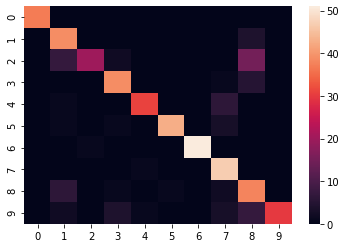

In [58]:
sns.heatmap(matrix)

<AxesSubplot:>

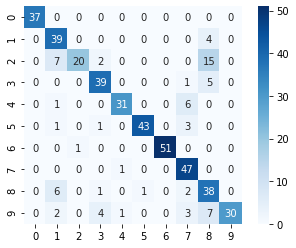

In [60]:
sns.heatmap(matrix, annot= True, cmap= 'Blues', square= True)  # Square is a new!! Makes the plot SQUARE!

**The book has also described the technique to visualise the error in this way.**

In [68]:
Ypred = model.predict(Xtest)

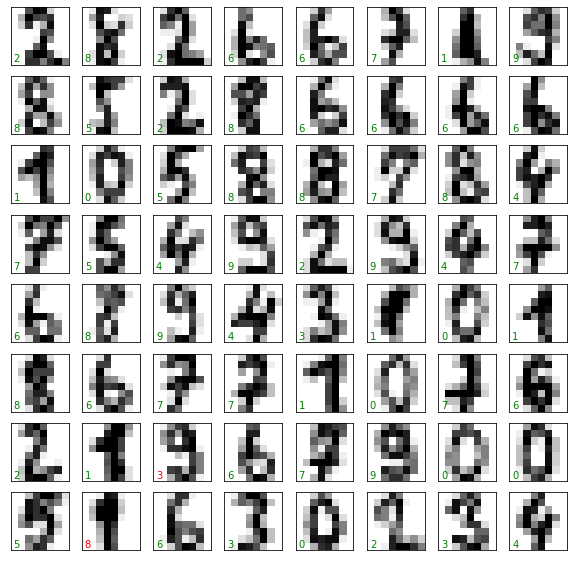

In [70]:
fig, axes = plt.subplots(8, 8, figsize= (10,10), subplot_kw= {'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8,8), cmap= 'binary', interpolation= 'nearest')
    ax.text(.05, .05, Ypred[i], transform= ax.transAxes, color= 'green' if Ypred[i] == Ytest[i] else 'red')

# That's it!
Now, in the upcoming notebooks we will discuss about the new concepts in depth.